# Income Prediction

# Problem Statement: 
The objective of this machine learning task is to construct a predictive model for classifying individuals 
based on whether their income exceeds a specified threshold of $50,000. 

# Dataset Description:
The provided dataset encompasses a variety of demographic, socio-economic, and employment-related features for a diverse 
group of individuals. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [31]:
# Load dataset
train_data = pd.read_csv("/content/Train.csv")
test_data = pd.read_csv("/content/Test.csv")

In [32]:
# Handling missing data

In [33]:
train_data.drop(['migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg','residence_1_year_ago','old_residence_reg','old_residence_state','class','education_institute','unemployment_reason','is_labor_union','occupation_code_main','under_18_family','veterans_admin_questionnaire'], axis=1, inplace=True)
test_data.drop(['migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg','residence_1_year_ago','old_residence_reg','old_residence_state','class','education_institute','unemployment_reason','is_labor_union','occupation_code_main','under_18_family','veterans_admin_questionnaire'], axis=1, inplace=True)

In [34]:
train_data.replace('?', np.NaN,inplace = True)
train_data.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,...,0,0,292,Native,95,US,US,US,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,US,US,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,...,0,0,0,Native,94,US,US,US,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,India,India,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,0,0,0,Native,95,US,US,US,1580.79,Below limit


In [35]:
test_data.replace('?', np.NaN,inplace = True)
test_data.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,600,...,Joint both under 65,0,0,0,Native,94,US,US,US,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Married-civilian spouse present,White,Central or South American,Full-time schedules,0,0,...,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,El-Salvador,El-Salvador,El-Salvador,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Full-time schedules,1,0,...,Joint both under 65,15024,0,500,Native,95,US,US,US,4898.55
3,ID_TZ209502,16,Female,9th grade,Never married,White,All other,Children or Armed Forces,0,0,...,Single,0,0,0,Native,94,US,US,US,1391.44
4,ID_TZ209503,16,Male,9th grade,Never married,White,All other,Not in labor force,0,0,...,Nonfiler,0,0,0,Native,95,US,US,US,1933.18


In [36]:
train_data.fillna(method = 'ffill', inplace = True)

In [37]:
test_data.fillna(method = 'ffill', inplace = True)

In [38]:
# Encoding categorical variable

In [39]:
# For train_data

# Initialize LabelEncoder
le = LabelEncoder()

# Iterate over each column in the DataFrame
for column in train_data.columns:
    if train_data[column].dtype == 'object':  # Check if the column contains categorical data
        train_data[column] = le.fit_transform(train_data[column])  # Transform the categorical data

train_data.head()


,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_above_limit
0,0,79,0,12,6,4,0,2,0,0,...,0,0,292,4,95,42,42,42,1779.74,1
1,1,65,0,12,6,4,0,0,0,0,...,0,0,0,4,94,42,42,42,2366.75,1
2,2,21,1,2,4,2,0,0,0,500,...,0,0,0,4,94,42,42,42,1693.42,1
3,3,2,0,10,4,1,0,0,0,0,...,0,0,0,4,94,42,19,19,1380.27,1
4,4,70,1,12,2,4,0,2,0,0,...,0,0,0,4,95,42,42,42,1580.79,1


In [40]:
# For test_data

# Initialize LabelEncoder
le = LabelEncoder()

# Iterate over each column in the DataFrame
for column in test_data.columns:
    if test_data[column].dtype == 'object':  # Check if the column contains categorical data
        test_data[column] = le.fit_transform(test_data[column])  # Transform the categorical data

test_data.head()


,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record
0,0,54,1,12,2,4,0,0,0,600,...,2,0,0,0,4,94,42,42,42,3388.96
1,1,53,1,4,2,4,1,1,0,0,...,2,0,0,0,0,95,8,8,8,1177.55
2,2,42,1,9,2,4,0,1,1,0,...,2,15024,0,500,4,95,42,42,42,4898.55
3,3,16,0,6,4,4,0,0,0,0,...,5,0,0,0,4,94,42,42,42,1391.44
4,4,16,1,6,4,4,0,2,0,0,...,4,0,0,0,4,95,42,42,42,1933.18


<Axes: xlabel='income_above_limit', ylabel='age'>

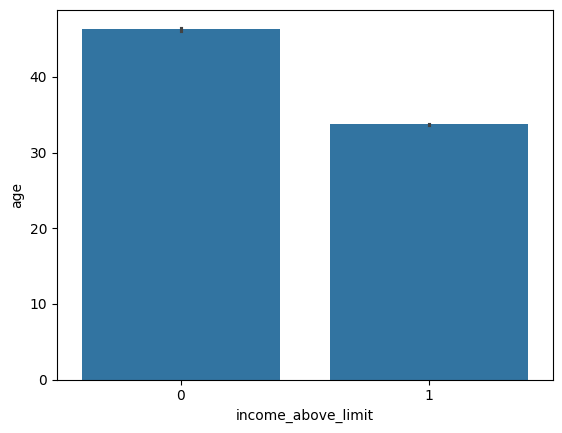

In [41]:
sns.barplot(x = 'income_above_limit', y = 'age', data = train_data)

<Axes: >

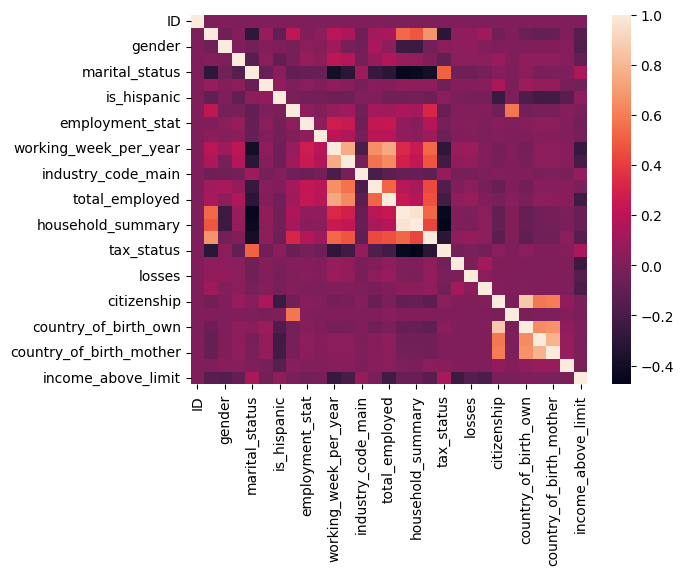

In [42]:
sns.heatmap(train_data.corr())

<Axes: >

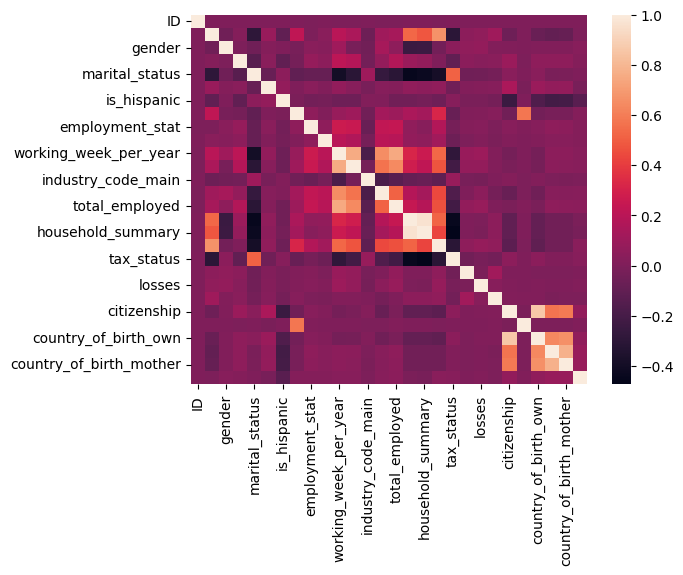

In [43]:
sns.heatmap(test_data.corr())

In [44]:
# Concatenating DataFrames

In [45]:
df=pd.concat([train_data,test_data],axis=1)
df

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record
0,0,79,0,12,6,4,0,2,0,0,...,2.0,0.0,0.0,0.0,4.0,94.0,42.0,42.0,42.0,3388.96
1,1,65,0,12,6,4,0,0,0,0,...,2.0,0.0,0.0,0.0,0.0,95.0,8.0,8.0,8.0,1177.55
2,2,21,1,2,4,2,0,0,0,500,...,2.0,15024.0,0.0,500.0,4.0,95.0,42.0,42.0,42.0,4898.55
3,3,2,0,10,4,1,0,0,0,0,...,5.0,0.0,0.0,0.0,4.0,94.0,42.0,42.0,42.0,1391.44
4,4,70,1,12,2,4,0,2,0,0,...,4.0,0.0,0.0,0.0,4.0,95.0,42.0,42.0,42.0,1933.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,209494,16,0,5,4,4,0,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209495,209495,78,1,9,2,4,0,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209496,209496,8,0,10,4,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209497,209497,26,0,16,2,4,0,0,0,700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.fillna(method = 'ffill', inplace = True)

In [47]:
df

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record
0,0,79,0,12,6,4,0,2,0,0,...,2.0,0.0,0.0,0.0,4.0,94.0,42.0,42.0,42.0,3388.96
1,1,65,0,12,6,4,0,0,0,0,...,2.0,0.0,0.0,0.0,0.0,95.0,8.0,8.0,8.0,1177.55
2,2,21,1,2,4,2,0,0,0,500,...,2.0,15024.0,0.0,500.0,4.0,95.0,42.0,42.0,42.0,4898.55
3,3,2,0,10,4,1,0,0,0,0,...,5.0,0.0,0.0,0.0,4.0,94.0,42.0,42.0,42.0,1391.44
4,4,70,1,12,2,4,0,2,0,0,...,4.0,0.0,0.0,0.0,4.0,95.0,42.0,42.0,42.0,1933.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,209494,16,0,5,4,4,0,2,0,0,...,5.0,0.0,0.0,0.0,4.0,95.0,42.0,42.0,42.0,1997.29
209495,209495,78,1,9,2,4,0,2,0,0,...,5.0,0.0,0.0,0.0,4.0,95.0,42.0,42.0,42.0,1997.29
209496,209496,8,0,10,4,4,0,0,0,0,...,5.0,0.0,0.0,0.0,4.0,95.0,42.0,42.0,42.0,1997.29
209497,209497,26,0,16,2,4,0,0,0,700,...,5.0,0.0,0.0,0.0,4.0,95.0,42.0,42.0,42.0,1997.29


# Splitting Data

In [49]:
x = df.drop(['income_above_limit'], axis = 1)
y = df['income_above_limit']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Model Training

In [52]:
dt_regressor = DecisionTreeRegressor(random_state=28)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=28)

In [53]:
# Model Evaluation

In [54]:
y_pred = dt_regressor.predict(x_test)

In [55]:
print(classification_report(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('\nAccuracy Score: ',accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.43      0.48      0.46      2612
           1       0.97      0.96      0.96     39288

    accuracy                           0.93     41900
   macro avg       0.70      0.72      0.71     41900
weighted avg       0.93      0.93      0.93     41900

Confusion Matrix:
 [[ 1258  1354]
 [ 1659 37629]]

Accuracy Score:  92.8090692124105


# Feature Importance Calculation

In [57]:
# Get feature importances
importances = dt_regressor.feature_importances_

# Define the threshold for feature importance
threshold = 0.05

# Filter out relevant features
relevant_features = x.columns[importances > threshold]

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importances})

# Print the feature importance DataFrame
print(feature_importance_df)

# Print the relevant features
print("\nRelevant Features:")
print(relevant_features)


                    Feature  Importance
0                        ID    0.070511
1                       age    0.073520
2                    gender    0.040495
3                 education    0.035700
4            marital_status    0.009680
5                      race    0.005963
6               is_hispanic    0.006193
7     employment_commitment    0.010505
8           employment_stat    0.008175
9             wage_per_hour    0.009494
10    working_week_per_year    0.061711
11            industry_code    0.034469
12       industry_code_main    0.023238
13          occupation_code    0.077694
14           total_employed    0.024432
15           household_stat    0.009939
16        household_summary    0.003647
17              vet_benefit    0.001262
18               tax_status    0.012388
19                    gains    0.129626
20                   losses    0.024600
21            stocks_status    0.083470
22              citizenship    0.002093
23                 mig_year    0.006435


# Balancing the Dataset

In [59]:
# Balancing the Dataset using SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)